In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.set_printoptions(suppress=True)

## Load the dataset and set-up the labels

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
## Plot a random image

/tmp/ipykernel_134/502236697.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title((labels[int(label)]))


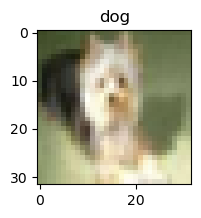

In [4]:
i=182
label = y_train[i]
image = x_train[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title((labels[int(label)]))
plt.imshow(image)
plt.show()

## Normalise and reshape the input data

In [5]:
y_input = tf.keras.utils.to_categorical(y_train)
x_input = (np.reshape(x_train, (x_train.shape[0], 3072)) / 255.0).astype(np.float32)

## Create the 2-layer neural network

In [6]:
layer1 = tf.keras.layers.Dense(units=512, activation=tf.nn.relu)
layer2 = tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
def predict(x):
    # input Layer
    middle_layer = layer1(x)

    # logits Layer
    output_layer = layer2(middle_layer)
    return output_layer

## Define the loss function as the cross-entropy loss

In [7]:
@tf.function
def loss(x,y):
    y_ = predict(x)
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))
    return cross_entropy

## Create the training routines

In [8]:
lr = 0.001
train_steps = 2500
# we'll use the Adam optimizer instead of gradient descent.
optimizer = tf.optimizers.Adam(lr)

## Now we run the training

In [9]:
for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(x_input,y_input)
        gradients = tape.gradient(current_loss, tape.watched_variables())
        optimizer.apply_gradients(zip(gradients, tape.watched_variables()))
        if i%100 == 0:
            print('Training Step:' + str(i) + ' Loss = ' + str(current_loss))


Training Step:0 Loss = tf.Tensor(2.5218554, shape=(), dtype=float32)
Training Step:100 Loss = tf.Tensor(1.7703075, shape=(), dtype=float32)
Training Step:200 Loss = tf.Tensor(1.6479583, shape=(), dtype=float32)
Training Step:300 Loss = tf.Tensor(1.5782588, shape=(), dtype=float32)
Training Step:400 Loss = tf.Tensor(1.5293185, shape=(), dtype=float32)
Training Step:500 Loss = tf.Tensor(1.4884275, shape=(), dtype=float32)
Training Step:600 Loss = tf.Tensor(1.4517834, shape=(), dtype=float32)
Training Step:700 Loss = tf.Tensor(1.4193194, shape=(), dtype=float32)
Training Step:800 Loss = tf.Tensor(1.3899047, shape=(), dtype=float32)
Training Step:900 Loss = tf.Tensor(1.3660665, shape=(), dtype=float32)
Training Step:1000 Loss = tf.Tensor(1.3328736, shape=(), dtype=float32)
Training Step:1100 Loss = tf.Tensor(1.3068208, shape=(), dtype=float32)
Training Step:1200 Loss = tf.Tensor(1.2929485, shape=(), dtype=float32)
Training Step:1300 Loss = tf.Tensor(1.2591094, shape=(), dtype=float32)


KeyboardInterrupt: 

## Print out the accuracy on the training data

In [10]:
y_prob = predict(x_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('train accuracy: ', np.sum(y_pred==y_train[:,0])/len(y_train))

(50000, 10)
train accuracy:  0.57108


## Test on the test data

In [11]:

## shallow should be around 0.4 accuracy
x_test_input = (np.reshape(x_test, (x_test.shape[0], 3072)) / 255.0).astype(np.float32)

y_prob = predict(x_test_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test[:,0])/len(y_test))

(10000, 10)
test accuracy:  0.4979


## Plot a few images with their classification

/tmp/ipykernel_134/3149002973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('True: %s, Predicted: %s (%d%% certainty)' % (labels[int(label)],labels[y_prob[i].argmax()],100*y_prob[i,y_prob[i].argmax()]))


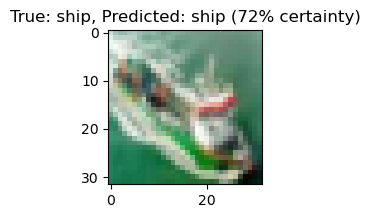

In [15]:
i=15

label = y_test[i]
image = x_test[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title('True: %s, Predicted: %s (%d%% certainty)' % (labels[int(label)],labels[y_prob[i].argmax()],100*y_prob[i,y_prob[i].argmax()]))
plt.imshow(image)
plt.show()

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 47.6 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
!wget https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg


--2024-04-29 10:07:59--  https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.4.59, 142.250.191.123, 142.250.191.155, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.4.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524483 (512K) [image/jpeg]
Saving to: 'dataset-card.jpg'

dataset-card.jpg    100%[===================>] 512.19K  --.-KB/s    in 0.09s   

2024-04-29 10:07:59 (5.77 MB/s) - 'dataset-card.jpg' saved [524483/524483]



In [6]:
!mv dataset-card.jpg iris.jpg

In [ ]:
img = cv2.imread('iris.jpg')
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

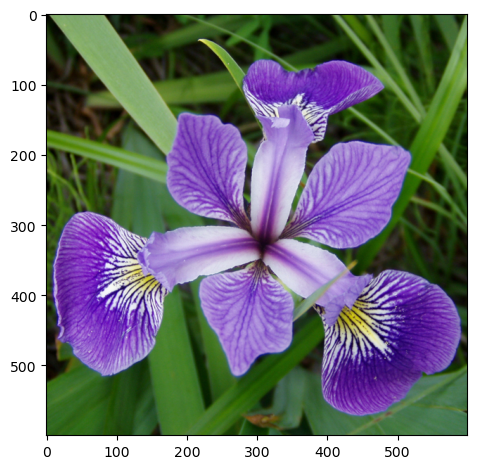

In [5]:
img = cv2.imread('iris.jpg')
fig = plt.figure(tight_layout=True)
im = plt.imshow(img[...,::-1])
plt.show()

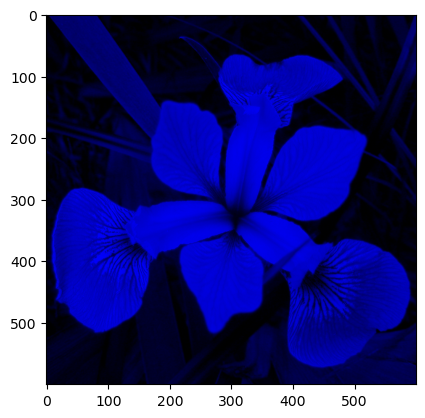

In [6]:
img[:,:,1:] = 0
im = plt.imshow(img[...,::-1])
plt.show()

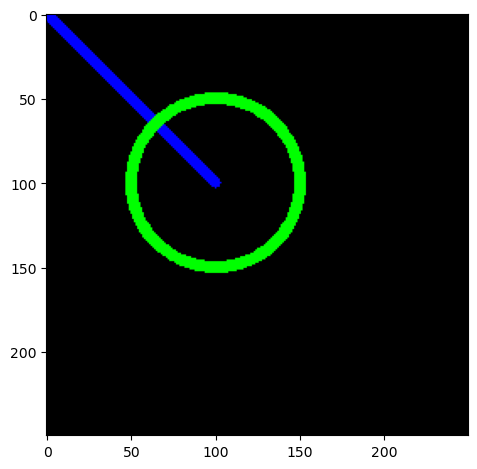

In [9]:
img = np.zeros((250,250,3), dtype=np.uint8)
img = cv2.line(img,(0,0),(100,100),(255,0,0),5)
img = cv2.circle(img,(100,100),50,(0,255,0),5)

fig = plt.figure(tight_layout=True)
im = plt.imshow(img[...,::-1])
plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.set_printoptions(suppress=True)

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()


y_input = tf.keras.utils.to_categorical(y_train)
x_input = np.reshape(x_train, (x_train.shape[0], 3072)) / 255.0


y_valid = tf.keras.utils.to_categorical(y_test)
x_valid = np.reshape(x_test, (x_test.shape[0], 3072)) / 255.0

In [11]:
model = tf.keras.Sequential()
# Adds a densely-connected layer with 512 units to the model:
model.add(tf.keras.layers.Dense(512, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_input, y_input, epochs=100, batch_size=256,validation_data=(x_valid, y_valid))

Epoch 1/100
196/196 [==============================] - 2s 6ms/step - loss: 2.1256 - accuracy: 0.2834 - val_loss: 1.8731 - val_accuracy: 0.3311
Epoch 2/100
196/196 [==============================] - 1s 4ms/step - loss: 1.8191 - accuracy: 0.3568 - val_loss: 1.7715 - val_accuracy: 0.3711
Epoch 3/100
196/196 [==============================] - 1s 4ms/step - loss: 1.7402 - accuracy: 0.3882 - val_loss: 1.7143 - val_accuracy: 0.3904
Epoch 4/100
196/196 [==============================] - 1s 4ms/step - loss: 1.6822 - accuracy: 0.4066 - val_loss: 1.6736 - val_accuracy: 0.4050
Epoch 5/100
196/196 [==============================] - 1s 4ms/step - loss: 1.6297 - accuracy: 0.4232 - val_loss: 1.6118 - val_accuracy: 0.4234
Epoch 6/100
196/196 [==============================] - 1s 4ms/step - loss: 1.5902 - accuracy: 0.4402 - val_loss: 1.6429 - val_accuracy: 0.4090
Epoch 7/100
196/196 [==============================] - 1s 4ms/step - loss: 1.5618 - accuracy: 0.4490 - val_loss: 1.5880 - val_accuracy: 0.4368

In [13]:
input_layer = tf.keras.Input(shape=(3072,))

# Adds a densely-connected layer with 512 units to the model:
output_layer = tf.keras.layers.Dense(512, activation='relu')(input_layer)
# Add a softmax layer with 10 output units:
output_layer = tf.keras.layers.Dense(10, activation='softmax')(output_layer)

In [14]:
input_layer = tf.keras.Input(shape=(3072,))

# Adds a densely-connected layer with 512 units to the model:
output_layer = tf.keras.layers.Dense(512, activation='relu')(input_layer)
# Add a softmax layer with 10 output units:
output_layer = tf.keras.layers.Dense(10, activation='softmax')(output_layer)

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

In [16]:
model = VGG16()


553467096/553467096 [==============================] - 3s 0us/step


In [17]:
print(model.summary())


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
import urllib

def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    # return the image
    return image

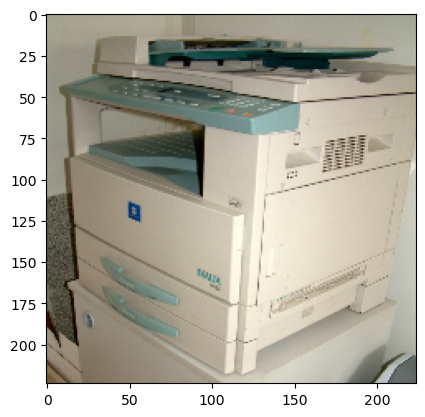

In [19]:
# an image of a photocopier
copier = url_to_image('https://upload.wikimedia.org/wikipedia/commons/7/7e/' + 
                            'Photocopying_kserokopiarka.jpg') 
# we have to resize the image to be 224x224 as this
# is the size of the images VGG16 can process
image = cv2.resize(copier, (224,224))

# we'll show the image to see what it looks like
im = plt.imshow(image)
plt.grid(False)
plt.show()

In [20]:
image = preprocess_input(image)


In [21]:
prediction = model.predict(image[None,:],verbose=0)


In [22]:
labels = decode_predictions(prediction,top=5)[0]

for l in labels:
    print('%s (%.2f%%)' % (l[1], l[2]*100))

35363/35363 [==============================] - 0s 1us/step
photocopier (99.53%)
printer (0.46%)
file (0.01%)
desk (0.01%)
crate (0.00%)
